## From Scratch Implementation

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# % matplotlib inline
plt.rcParams.update({'font.size': 14})

In [2]:
adv_data = pd.read_csv('Advertising_N200_p3.csv').to_numpy()
print("shape: {}".format(adv_data.shape))

shape: (200, 4)


In [3]:
N = len(adv_data)
batch_size = 10
learn_rate = 2.5 * (10 ** -6)
n_iterations = 20000
f = np.hstack([np.ones((len(adv_data), 1)), adv_data])
X = f[:, 0:-1]
Y = f[:, -1].reshape((len(adv_data), 1))

In [4]:
def error(X, Y, beta):
    return Y - np.matmul(X, beta)

def residual_sum_squares(X, Y, beta):
    e = error(X, Y, beta)
    return np.matmul(e.T, e)

def mean_squared_error(X, Y, beta):
    return residual_sum_squares(X, Y, beta) / len(X)

def shuffle(arr):
    n = len(arr)
    shuffle_index = random.sample(range(0, n), n)
    return arr[shuffle_index, :]

def normalize_array(arr, min_val=-1.0, max_val=1.0):
    arr_min = min(arr)
    arr_max = max(arr)
    return (((arr - arr_min) / (arr_max - arr_min)) * (max_val - min_val)) + min_val

def mini_batch_gradient_decent(f, batch_size, n_iterations):
    p = (f.shape[1] - 2)
    beta = normalize_array(np.random.default_rng().standard_normal(p + 1).reshape((p + 1, 1)))
    beta_values = np.zeros((n_iterations, p + 1))
    cost_values = np.zeros((n_iterations, 1))
    for i in range(n_iterations):
        start_index = 0
        beta_values[i] = beta.T
        cost_values[i] = residual_sum_squares(X, Y, beta)
        f_shuffled = shuffle(f)
        for j in range(int(N / batch_size)):
            y = f_shuffled[start_index:start_index + batch_size, -1].reshape(batch_size, 1)
            x = f_shuffled[start_index:start_index + batch_size, 0:-1]
            beta = beta + (2 * learn_rate) * np.matmul(x.T, y - np.matmul(x, beta))
            start_index += batch_size
    return beta, beta_values, cost_values

In [5]:
beta, beta_values, cost_values = mini_batch_gradient_decent(f, batch_size, n_iterations)

In [6]:
print(beta_values.shape)

(20000, 4)


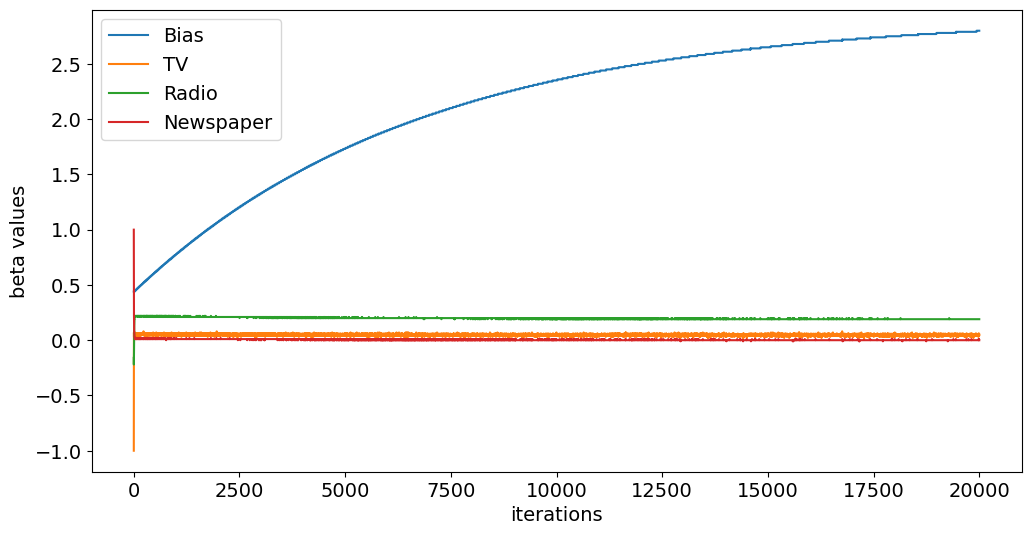

In [7]:
beta_values = np.round(beta_values, 2)
plt.figure(figsize=(12,6))
plt.plot(beta_values[:,0], label = "Bias")
plt.plot(beta_values[:,1], label = "TV")
plt.plot(beta_values[:,2], label = "Radio")
plt.plot(beta_values[:,3], label = "Newspaper")
plt.xlabel('iterations')
plt.ylabel('beta values')
plt.legend()
plt.show()

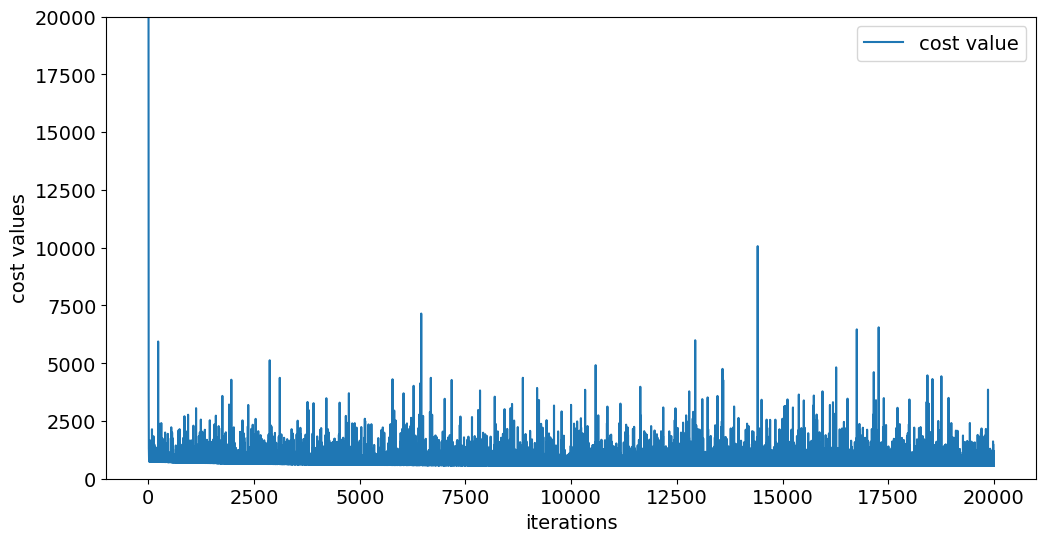

In [8]:
cost_values = np.round(cost_values, 2)
plt.figure(figsize=(12,6))
plt.plot(cost_values, label = "cost value")
plt.xlabel('iterations')
plt.ylabel('cost values')
plt.ylim(0,20000)
plt.legend()
plt.show()

In [9]:
beta_cap = np.round(beta, 2)
print('The best-fit model parameters are,')
print("beta 0 = {}\nbeta 1 = {}\nbeta 2 = {}\nbeta 3 = {}".format(*beta_cap))

The best-fit model parameters are,
beta 0 = [2.8]
beta 1 = [0.05]
beta 2 = [0.19]
beta 3 = [0.]


In [10]:
mse = np.round(mean_squared_error(X, Y, beta_cap), 3)
print('The Mean Squared Error using the best-fit model parameters is,')
print(*mse[0])

The Mean Squared Error using the best-fit model parameters is,
3.221
